In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_footsteps_accelerations_absolute
%store -r Y_footsteps_accelerations_absolute
%store -r X_footsteps_continuous_absolute
%store -r Y_footsteps_continuous_absolute
#X_motion = np.concatenate((X_footsteps_accelerations_absolute, X_footsteps_continuous_absolute))
#Y_motion = np.concatenate((Y_footsteps_accelerations_absolute, Y_footsteps_continuous_absolute))

X_motion = X_footsteps_accelerations_absolute
Y_motion = Y_footsteps_accelerations_absolute
print(X_motion.shape)
print(Y_motion.shape)

(1932, 20)
(1932, 4)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FL/RR are swinging
idxs = np.where(X_motion[:, -2] == 1)[0]
X_motion_RR_swinging = X_motion[idxs]
Y_motion_RR_swinging = Y_motion[idxs]

## Predict RR foot -> x

In [8]:
X_motion_RR_swinging[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.22390036,  0.12859112,
       -0.37658507,  0.25049651, -0.12533796, -0.37892041, -0.2461364 ,
        0.12974694, -0.37987021, -0.27811545, -0.12813234, -0.37796211,
        0.1       ,  0.        ,  0.        ,  1.        ,  0.        ])

In [9]:
Y_motion_RR_swinging[0, :]

array([ 0.05480993, -0.00199642,  0.05787881,  0.00123617])

### Linear Regression

In [10]:
# Input
X = np.hstack((X_motion_RR_swinging[:, :3], # Previous motion command
               X_motion_RR_swinging[:, -5:-2], # Current motion command
               X_motion_RR_swinging[:, 3:5], # FL (x,y) position
               X_motion_RR_swinging[:, 6:8], # FR (x,y) position
               X_motion_RR_swinging[:, 9:11], # RL (x,y) position
               X_motion_RR_swinging[:, 12:14])) # RR (x, y) position

# Target
Y = np.array([Y_motion_RR_swinging[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rr_relative_swinging_x = LinearRegression()

# Fit the model
model_rr_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9961932102317465
RMSE:  0.007747876727389087
The lowest error is:  2.9882765448019377e-05
The highest error is:  0.02759434223599333
The avg. error is:  0.005962210325654673


In [11]:
model_rr_relative_swinging_x.coef_

array([[ 2.82719982e-01,  1.66533454e-16,  4.44089210e-16,
        -5.96725602e-02,  1.38777878e-16,  1.66533454e-16,
         1.95097037e-01, -2.44264969e-01,  5.88833096e-01,
         3.54226281e-01,  6.99170463e-01,  1.58623184e-01,
        -1.45174788e+00, -3.27025609e-01]])

In [12]:
model_rr_relative_swinging_x.intercept_

array([-0.37073426])

Text(0, 0.5, 'Predictions')

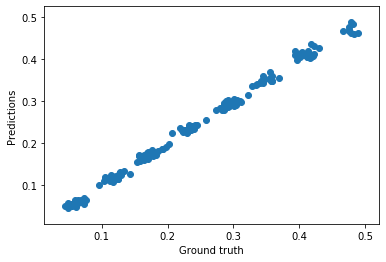

In [13]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [14]:
#%store model_rr_relative_swinging_x

In [15]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [16]:
# Save model
#joblib.dump(model_rr_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_x.sav")

### Predict RR foot -> y

In [17]:
# Input
X = np.hstack((X_motion_RR_swinging[:, :3], # Previous motion command
               X_motion_RR_swinging[:, -5:-2], # Current motion command
               X_motion_RR_swinging[:, 3:5], # FL (x,y) position
               X_motion_RR_swinging[:, 6:8], # FR (x,y) position
               X_motion_RR_swinging[:, 9:11], # RL (x,y) position
               X_motion_RR_swinging[:, 12:14])) # RR (x, y) position

# Target
Y = np.array([Y_motion_RR_swinging[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rr_relative_swinging_y = LinearRegression()

# Fit the model
model_rr_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  -1.0400892464733462
RMSE:  0.0052537472087901054
The lowest error is:  9.47507283495519e-06
The highest error is:  0.017052053427922043
The avg. error is:  0.004007258258205443


In [18]:
model_rr_relative_swinging_y.coef_

array([[-1.34607285e-02,  1.31838984e-16,  1.70002901e-16,
        -2.99588697e-02, -5.55111512e-17, -2.08166817e-16,
         9.11113195e-02, -3.05566666e-01, -8.33596010e-03,
         2.95800332e-01,  1.29373490e-01,  1.73964119e-01,
        -2.01566050e-01, -8.01167950e-01]])

In [19]:
model_rr_relative_swinging_y.intercept_

array([-0.08681985])

Text(0, 0.5, 'Predictions')

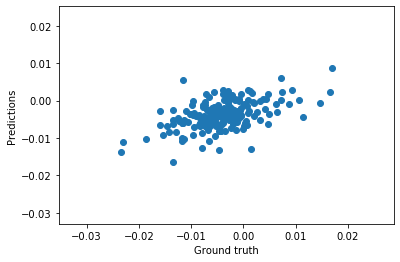

In [20]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [21]:
#for idx, prediction in enumerate(predictions):
#    print(f'Input: {X_test[idx]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')